In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
np.random.seed(10)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [3]:
#以白底黑字顯示2*2吋大小的圖片
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show() 

#顯示圖片、真實值
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[start_id])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[start_id]==labels[start_id] else ' (x)') 
            title += '\nlabel = ' + str(labels[start_id])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[start_id])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

Train Data shape:(60000, 28, 28)
Test Data shape:(10000, 28, 28)
Train Label shape:(60000,)
Test Label shape:(10000,)


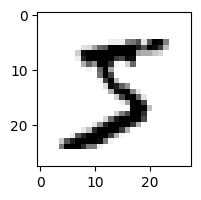

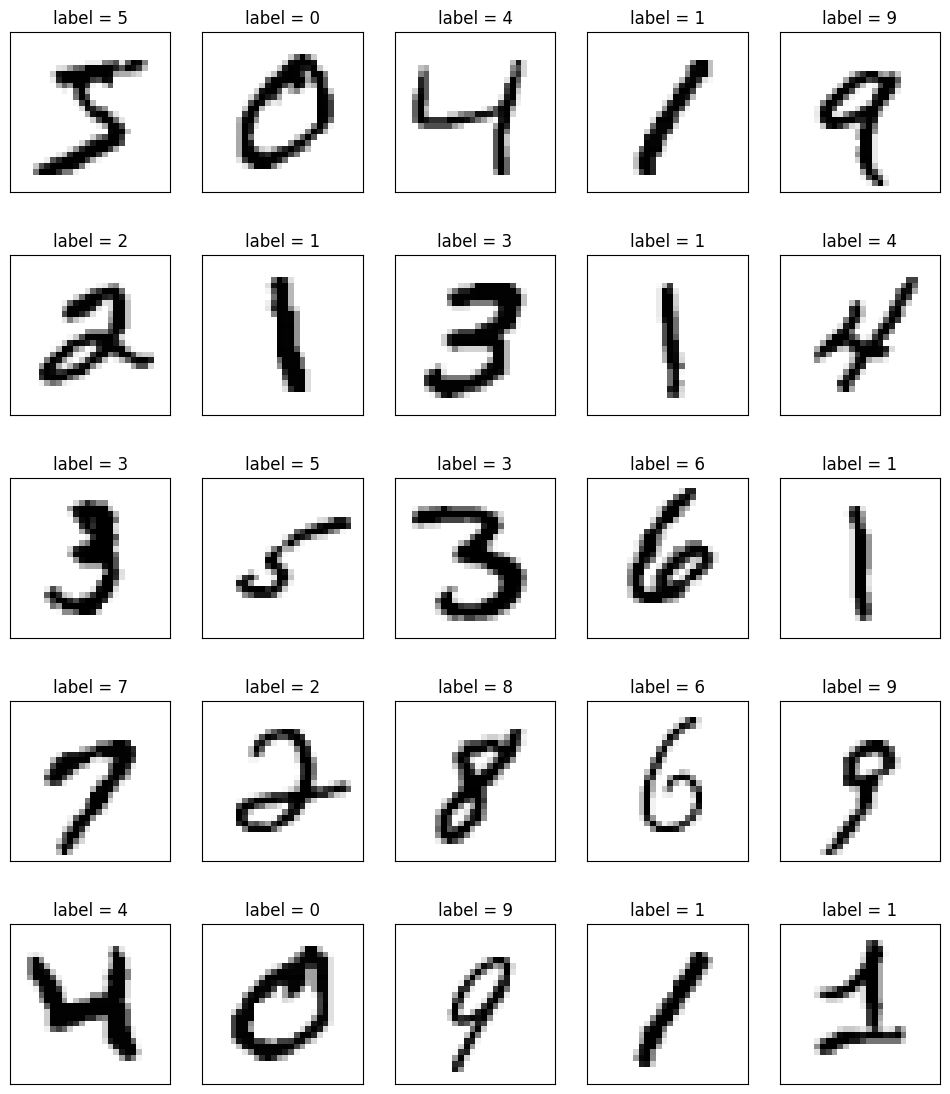

In [4]:
#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤
(train_feature, train_label),(test_feature, test_label) = mnist.load_data()

# 訓練資料筆數與維度大小
# 測試資料筆數與維度大小
print("Train Data shape:" + str(train_feature.shape))
print("Test Data shape:" + str(test_feature.shape))
print("Train Label shape:" + str(train_label.shape))
print("Test Label shape:" + str(test_label.shape))

show_image(train_feature[0]) 
show_images_labels_predictions(train_feature,train_label,[],0,50)   

In [5]:
#將 Features 特徵值轉換為 784個 float 數字的 1 維向量
train_feature_vector =train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

In [6]:
#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [8]:
#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = to_categorical(train_label)
test_label_onehot = to_categorical(test_label)
print(test_label_onehot)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
#建立模型
model = Sequential()
#輸入層：784, 隱藏層：256，輸出層：10
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
#model.add(Dense(units=256,  
#                kernel_initializer='normal', 
#                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
model.summary()  # 模型可視化

#定義訓練方式：選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [10]:
#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Epoch 1/10


240/240 - 1s - loss: 0.4366 - accuracy: 0.8843 - val_loss: 0.2222 - val_accuracy: 0.9397 - 1s/epoch - 6ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1948 - accuracy: 0.9448 - val_loss: 0.1599 - val_accuracy: 0.9555 - 726ms/epoch - 3ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1398 - accuracy: 0.9601 - val_loss: 0.1321 - val_accuracy: 0.9603 - 733ms/epoch - 3ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1070 - accuracy: 0.9694 - val_loss: 0.1139 - val_accuracy: 0.9671 - 720ms/epoch - 3ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0849 - accuracy: 0.9767 - val_loss: 0.1005 - val_accuracy: 0.9696 - 723ms/epoch - 3ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0698 - accuracy: 0.9808 - val_loss: 0.0931 - val_accuracy: 0.9720 - 890ms/epoch - 4ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0560 - accuracy: 0.9849 - val_loss: 0.0870 - val_accuracy: 0.9737 - 926ms/epoch - 4ms/step
Epoch 8/10
240/240 - 2s - loss: 0.0468 - accuracy: 0.9872 - val_loss: 0.0849 - val_accuracy: 0.9739 - 2s/epoch - 7ms/step
Epoc

In [11]:
#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

313/313 [==============================] - 0s 973us/step - loss: 0.0735 - accuracy: 0.9773

準確率= 0.9772999882698059


In [12]:
#將模型儲存至 HDF5檔案中
model.save('Mnist_mlp_model.h5')

c:\01_MLP\nnenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
